<a href="https://www.kaggle.com/code/pologonz/vg-stats?scriptVersionId=96297873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


### Load data and view table head

In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### *Note: there seems to be a significant discontinuity in the data beginning around 2010 -we explore this at the end of the notebook*


### Which company is the most common video game publisher?

In [3]:
df['Publisher'].mode()

0    Electronic Arts
dtype: object

In [4]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

### What’s the most common platform?

In [5]:
df['Platform'].mode()

0    DS
dtype: object

In [6]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### What about the most common genre?

In [7]:
df['Genre'].mode()

0    Action
dtype: object

In [8]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

### What are the top 20 highest grossing games?

In [9]:
df.head(20).drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


### For North American video game sales, what’s the median?

In [10]:
df['NA_Sales'].median()

0.08

In [11]:
df[(df['NA_Sales'] > 0.07) & (df['NA_Sales'] < 0.09)].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
446,447,Dragon Warrior IV,NES,1990.0,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12
497,498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,Konami Digital Entertainment,0.08,1.24,1.13,0.45,2.90
1617,1619,Farming Simulator 2015,PC,2014.0,Simulation,Focus Home Interactive,0.08,1.02,0.00,0.13,1.23
1926,1928,Pro Evolution Soccer 2008,X360,2007.0,Sports,Konami Digital Entertainment,0.08,0.90,0.04,0.05,1.07
2067,2069,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,2006.0,Sports,Konami Digital Entertainment,0.08,0.90,0.02,0.00,1.00
2373,2375,Phantasy Star Portable 2,PSP,2009.0,Role-Playing,Sega,0.08,0.11,0.62,0.06,0.88
2579,2581,The Sims 2: Castaway,PSP,2007.0,Simulation,Electronic Arts,0.08,0.46,0.00,0.25,0.80
3186,3188,SingStar Queen,PS2,2009.0,Misc,Sony Computer Entertainment,0.08,0.12,0.00,0.44,0.63
3503,3505,Top Spin 3,PS3,2008.0,Action,Take-Two Interactive,0.08,0.37,0.00,0.12,0.57
3703,3705,Sonic & All-Stars Racing Transformed,PS3,2012.0,Racing,Sega,0.08,0.33,0.01,0.11,0.54


### For the top-selling game of all time, how many standard deviations above/below the mean are its sales for North America?

In [12]:
na_mean = df['NA_Sales'].mean()
na_mean

0.26466742981082064

In [13]:
na_std = df['NA_Sales'].std()
na_std

0.8166830292988796

In [14]:
top_game_globalsales = df['Global_Sales'].max()
top_game_globalsales

82.74

In [15]:
top_game_na_sales = df['NA_Sales'][df['Global_Sales'] == df['Global_Sales'].max()]
top_game_na_sales

0    41.49
Name: NA_Sales, dtype: float64

In [16]:
no_stds_from_na_mean = (top_game_na_sales - na_mean) // na_std
no_stds_from_na_mean

0    50.0
Name: NA_Sales, dtype: float64

### The Nintendo Wii seems to have outdone itself with games. How does its average number of sales compare with all of the other platforms?

In [17]:
df.groupby('Platform')['Global_Sales'].mean()

Platform
2600    0.729925
3DO     0.033333
3DS     0.486169
DC      0.307115
DS      0.380254
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.050370
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.269604
PCFX    0.030000
PS      0.610920
PS2     0.581046
PS3     0.720722
PS4     0.827679
PSP     0.244254
PSV     0.149952
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.699404
WiiU    0.572448
X360    0.774672
XB      0.313422
XOne    0.662254
Name: Global_Sales, dtype: float64

### Have average global VG sales increased over time?

In [18]:
avg_year = df.groupby('Year')['Global_Sales'].mean()
avg_year

Year
1980.0    1.264444
1981.0    0.777609
1982.0    0.801667
1983.0    0.987647
1984.0    3.597143
1985.0    3.852857
1986.0    1.765238
1987.0    1.358750
1988.0    3.148000
1989.0    4.320588
1990.0    3.086875
1991.0    0.786098
1992.0    1.771163
1993.0    0.766333
1994.0    0.654298
1995.0    0.402329
1996.0    0.757224
1997.0    0.695433
1998.0    0.676702
1999.0    0.743402
2000.0    0.577536
2001.0    0.687697
2002.0    0.477105
2003.0    0.461742
2004.0    0.549554
2005.0    0.488778
2006.0    0.516905
2007.0    0.508428
2008.0    0.475420
2009.0    0.466317
2010.0    0.476926
2011.0    0.453020
2012.0    0.553333
2013.0    0.674194
2014.0    0.579124
2015.0    0.430684
2016.0    0.206192
2017.0    0.016667
2020.0    0.290000
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

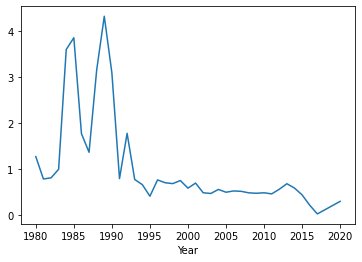

In [19]:
avg_year.plot()

In [20]:
df.groupby('Year')['Global_Sales'].max()

Year
1980.0     4.31
1981.0     4.50
1982.0     7.81
1983.0     3.20
1984.0    28.31
1985.0    40.24
1986.0     6.51
1987.0     4.38
1988.0    17.28
1989.0    30.26
1990.0    20.61
1991.0     4.61
1992.0    11.18
1993.0    10.55
1994.0     9.30
1995.0     5.15
1996.0    31.37
1997.0    10.95
1998.0    14.64
1999.0    23.10
2000.0     6.39
2001.0    14.98
2002.0    16.15
2003.0     7.20
2004.0    20.81
2005.0    24.76
2006.0    82.74
2007.0    22.72
2008.0    35.82
2009.0    33.00
2010.0    21.82
2011.0    14.76
2012.0    14.03
2013.0    21.40
2014.0    11.98
2015.0    14.24
2016.0     4.77
2017.0     0.03
2020.0     0.29
Name: Global_Sales, dtype: float64

### Note: there seems to be a significant discontinuity in the data beginning around 2010
#### Given that we know video game sales have continue to increase to date, possible changes include:
- Data collection methods could have become obsolete
- Sales reporting might have changed

### How have aggregate global VG sales increased over time?

In [21]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

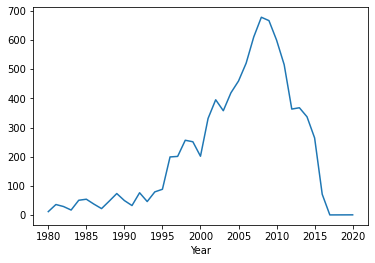

In [22]:
sales_by_year.plot()